In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../artifacts/movie_names_en.csv")

In [3]:
df.shape

(29594, 3)

In [4]:
df.head()

,Title,Release Date,Language
0,711 Ocean Drive,1950,American
1,Abbott and Costello in the Foreign Legion,1950,American
2,Across the Badlands,1950,American
3,The Admiral Was a Lady,1950,American
4,All About Eve,1950,American


In [5]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [6]:
df.shape

(28808, 3)

In [8]:
i = 0
idxToRemove = []
for i in range(df.shape[0]):
    try:
        if len(str(df['Title'][i]).split(" ")) == 1 or str(str(df['Title'][i]).split(" ")[0]) in [str(i) for i in range(0, 101)]:
            #print(df[df['Title'] == df['Title'][i]].index.values[0])
            idxToRemove.append(df[df['Title'] == df['Title'][i]].index.values[0])
    except:pass

In [9]:
df.drop(idxToRemove, inplace=True)

In [10]:
df.shape

(22644, 3)

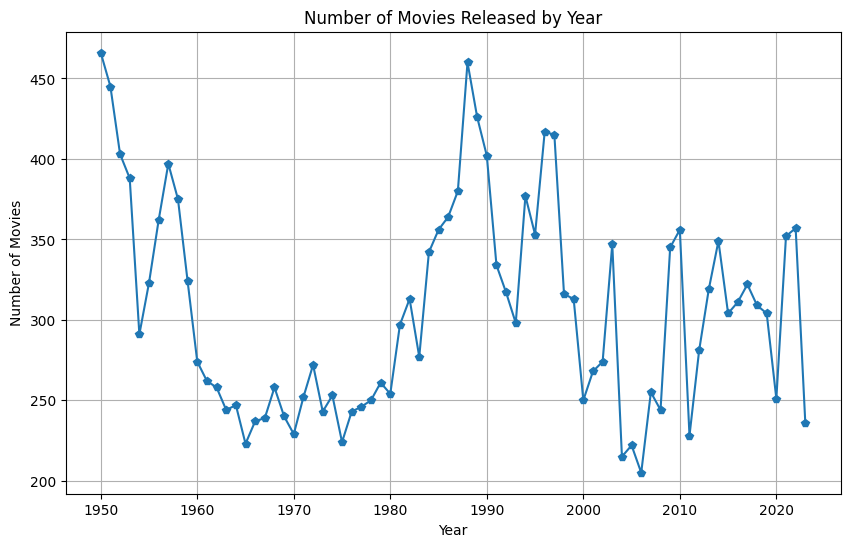

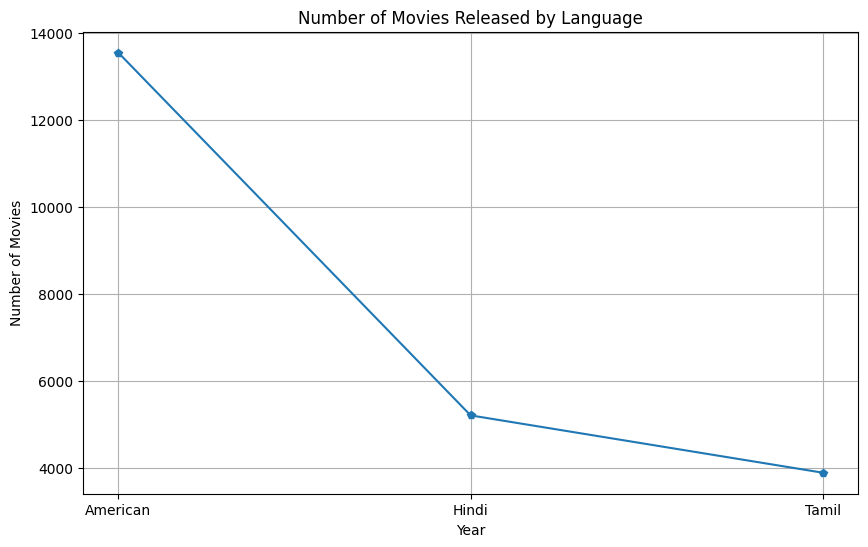

In [11]:

# Extract the release year from the 'Release Date' column
df['Year'] = df['Release Date']

# Group the movies by year and count the number of movies in each year
movies_by_year = df.groupby('Year').size()
movie_by_language = df.groupby("Language").size()

# Plotting the number of movies by year
plt.figure(figsize=(10, 6))
plt.plot(movies_by_year.index, movies_by_year.values, marker='p')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released by Year')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(movie_by_language.index, movie_by_language.values, marker='p')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released by Language')
plt.grid(True)
plt.show()

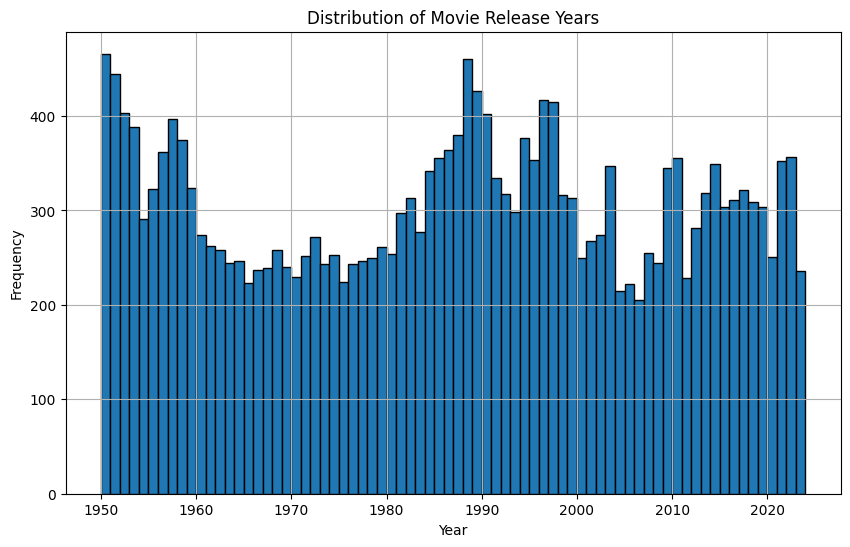

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=range(min(movies_by_year.index), max(movies_by_year.index) + 2, 1), edgecolor='black')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


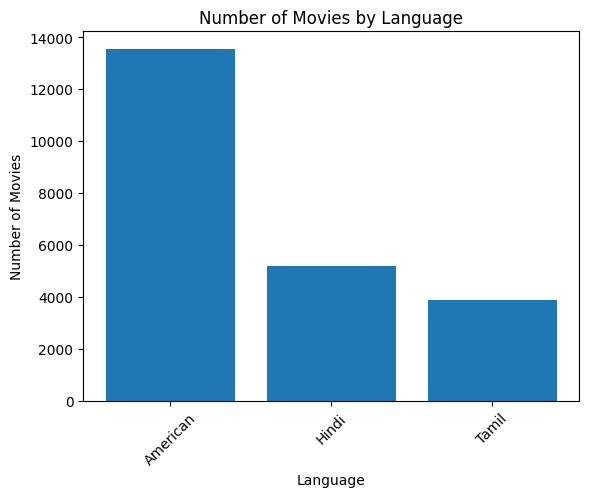

In [13]:

language_counts = df['Language'].value_counts()

plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Language')
plt.xticks(rotation=45)
plt.show()

In [14]:
df['Title'] = df['Title'].str.replace('[^\w\s]','')

In [15]:
df['Title'] = df['Title'].apply(lambda x: str(x).rstrip('\"'))
df['Title'] = df['Title'].apply(lambda x: str(x).lstrip('\"'))

df['Title'] = df['Title'].apply(lambda x: str(x).rstrip("\'"))
df['Title'] = df['Title'].apply(lambda x: str(x).lstrip("\'"))

In [16]:
df.head()

,Title,Release Date,Language,Year
0,711 Ocean Drive,1950,American,1950
1,Abbott and Costello in the Foreign Legion,1950,American,1950
2,Across the Badlands,1950,American,1950
3,The Admiral Was a Lady,1950,American,1950
4,All About Eve,1950,American,1950


In [17]:
df.drop(['Year'], axis=1, inplace=True)

In [18]:
df.to_csv("../artifacts/movie_names_preprocessed_en.csv", index=False)